In this assignment, we will implement Linear Regression with L2 Regularization to avoid overfitting.

## 0. Dataset
We have created a toy dataset for you to explore the effectiveness of regularization in a simple machine learning problem. The dataset is stored in two files: `lab05_x.txt` for the input and `lab05_y.txt` for the response (output) value. You can use the provided script to download these files.

---

Use the provided function `np.loadtxt(file_name.txt)` to load the dataset into two variables `x` and `y`. Using `plt.scatter`, plot the position of all samples in the dataset (`x` is the horizontal axis and `y` is the vertical axis)

[-2.         -1.91836735 -1.83673469 -1.75510204 -1.67346939 -1.59183673
 -1.51020408 -1.42857143 -1.34693878 -1.26530612 -1.18367347 -1.10204082
 -1.02040816 -0.93877551 -0.85714286 -0.7755102  -0.69387755 -0.6122449
 -0.53061224 -0.44897959 -0.36734694 -0.28571429 -0.20408163 -0.12244898
 -0.04081633  0.04081633  0.12244898  0.20408163  0.28571429  0.36734694
  0.44897959  0.53061224  0.6122449   0.69387755  0.7755102   0.85714286
  0.93877551  1.02040816  1.10204082  1.18367347  1.26530612  1.34693878
  1.42857143  1.51020408  1.59183673  1.67346939  1.75510204  1.83673469
  1.91836735  2.        ]


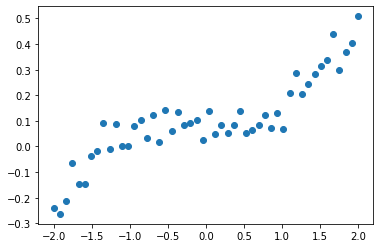

In [ ]:
#TYPE YOUR ANSWER HERE
x=np.loadtxt("lab05_x.txt")
print(x)
y=np.loadtxt("lab05_y.txt")
plt.scatter(x,y)

## 1. Polynomial Features
You can observe that a general straight line given by $y = \theta_1 x + \theta_0$ cannot represent this dataset efficiently. A better way of doing this one is construcing a set of polynomial features of $x$ such as: $x, x^2, x^3, x^4,...x^D$ where $D$ is the degree of the polynomial. Our linear regression model can be writen as an optimization for $\theta_{0-D}$ such that: 
$$y_{pred} = \theta_0 + \theta_1x + \theta_2x^2+... \theta_Dx^D = \sum_{i=0}^D \theta_i x^i$$
The relationship between all features are linear, hence we can use Linear Regression to find the optimal value of all $\theta$.
We have provided a function `get_polynomial_features` for you to generate the polynomial features for all input `x`.

For full documentation, please check out this link [Polynomial Features on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

---

* To have a better sense of polynomial features, let's print out a polynomial features vector **with degree 3** for an array having only 1 element.
* Assume that we don't know what is the best value of $D$ that best fits the dataset we are having. So let's try with $D=20$. Create a matrix `X_poly` where the $i^{th}$ row of this matrix contains the polynomial features of the sample $x_i$ in the toy dataset. 
Hint: the shape of `X_poly` should be $50 \times 20$.

Note: you should set `include_bias = False` (by default), since we can add bias later when we train the Linear Regression model.

In [ ]:
def get_polynomial_features(x, degree = 2, include_bias = False):
  """"
  Gets the polynomial features of an 1-D array x
  :param x: 1-D numpy input array
  :param include_bias: set to True if you want to add the value of (x^0 = 1) 
  :param degree: the  degree in the polynomial
  """
  poly = preprocessing.PolynomialFeatures(degree, include_bias = include_bias)
  return poly.fit_transform(x[:, None])
# X_poly=np.copy(x)[:,None]
# X_poly=np.concatenate((X_poly,get_polynomial_features(x, degree=20)),axis=1)
X_poly=get_polynomial_features(x,20)
# print(X_poly)
#TYPE YOUR ANSWER HERE

## 2. Linear Regression with Gradient Descent

For the purpose of this assignment, we have provided a function `run_optimizer` that helps you do gradient descent automatically, you just need to implement the loss function and its gradient and pass them as input parameters. In addition, the function `plot_func_curve` can help you to compare the predictions of your model with the ground-truth (label).

For more information, check out this documentation [scipy.optimize.fmin_cg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)


In [ ]:
#Provided functions, run this cell
def run_optimizer(func, grad_func, X, y):
  """
  Runs gradient descent to minimize a given function
  :param func: callable function, f(w), here w must be a 1-D array of the variables we want to optimize
  :param grad_func: callable function that returns the gradient of func at w
  :param X: training features matrix
  :param y: expected output (labels)
  :return best_w: the best value of w, using gradient descent
  """
  ld_L     = lambda w: func(X,y,w)
  ld_grad_L= lambda w: grad_func(X,y,w)
  w0 = np.random.rand(X.shape[1])
  best_w = optimize.fmin_cg(ld_L, w0, ld_grad_L)
  return best_w

def plot_func_curve(best_w, X_train, y):
  """
  Plots the prediction values curve and the ground-truth on the same plot
  :param best_w: the best weight (theta) that you found with gradient descent
  :param X: training features matrix
  :param y: expected output (labels)
  """
  x_linspace= np.linspace(-2,2)
  y_pred = X_train.dot(best_w)
  plt.figure()
  plt.plot(x_linspace, y_pred, color='red')
  plt.scatter(x_linspace, y)

Recall from Lab 03, the loss function and the gradient of the loss function in Linear Regression problem are:

$$
    J(\bar{\textbf{X}},\textbf{w}, \textbf{y}) = \frac{1}{2} || \bar{\textbf{X}}\textbf{w} - \textbf{y}||_2^2\\
$$
and
$$
\nabla J(\bar{\textbf{X}},\textbf{w}, \textbf{y}) = \bar{\textbf{X}}^\top(\bar{\textbf{X}}\textbf{w}^* - \textbf{y})
$$ 
Note that $\bar{\textbf{X}}$ is the augmented version of $\textbf{X}$ by stacking an all ones columns at the end of $\textbf{X}$.

---
Now you will need to follow these steps:

* Normalize $\textbf{X}$, by subtracting the mean and divide by the standard derivation of each feature. Hint: see Lab04
* Create matrix $\bar{\textbf{X}}$. Hint: $\bar{\textbf{X}}$ should have shape $50 \times 21$.
* The final matrix $\bar{\textbf{X}}$ should be saved in a variable called `X_train`

In [ ]:
#TYPE YOUR ANSWER HERE
def train(X):
  Xbar=X.mean(axis=0)
  sigmaX=X.std(axis=0)
  X_norm=(X-Xbar)/sigmaX
  return np.concatenate((X_norm,np.ones((len(X_norm),1))),axis=1)
X_train=train(X_poly)
print(X_train)

[[-1.69774938  2.10579893 -2.49365026 ... -4.46697047  4.42055451
   1.        ]
 [-1.62845348  1.847946   -2.20059883 ... -2.0237034   1.73463192
   1.        ]
 [-1.55915759  1.60083694 -1.93145611 ... -0.88577888  0.53554491
   1.        ]
 ...
 [ 1.55915759  1.60083694  1.93145611 ...  0.88577888  0.53554491
   1.        ]
 [ 1.62845348  1.847946    2.20059883 ...  2.0237034   1.73463192
   1.        ]
 [ 1.69774938  2.10579893  2.49365026 ...  4.46697047  4.42055451
   1.        ]]


* Implement the loss function `L` and its gradient `grad_L`
* Call the provided function `run_optimizer` with your loss function, training features `X_train` and expected output `y` 
* Using the provided function `plot_func_curve` to plot out the results, using the best weight `best_w` you found.
* What can you comment about the plot?

Optimization terminated successfully.
         Current function value: 0.000903
         Iterations: 271
         Function evaluations: 538
         Gradient evaluations: 538


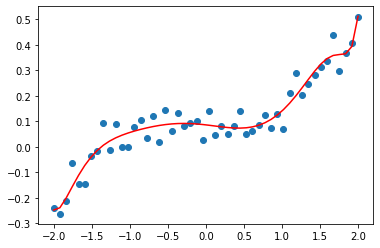

In [ ]:
def L(X,y,w):
  #TYPE YOUR ANSWER HERE
  return 0.5/len(y)*L2Norm(X.dot(w)-y)**2

def grad_L(X,y,w):
  #TYPE YOUR ANSWER HERE
  return 1/(len(y))*X.T.dot(X.dot(w)-y)

#Non-regularization
best_w  = run_optimizer(L, grad_L, X_train, y)
plot_func_curve(best_w, X_train, y)

Now we will add regularization into our Linear Regression model:
$$
    J(\bar{\textbf{X}},\textbf{w}, \textbf{y}) = \frac{1}{2} || \bar{\textbf{X}}\textbf{w} - \textbf{y}||_2^2 + \frac{\lambda}{2}||\textbf{w}||_2^2\\
$$
and
$$
\nabla J(\bar{\textbf{X}},\textbf{w}, \textbf{y}) = \bar{\textbf{X}}^\top(\bar{\textbf{X}}\textbf{w}^* - \textbf{y}) + \lambda \textbf{w}
$$ 
Here, $\lambda$ is a scalar, controls the importance of the regularization term. For now, just set $\lambda = 1$

**Important: Do not normalize the bias term!**
---

* Implement the loss function with regularization `L_reg` and its gradient `grad_L_reg`
* Call the provided function `run_optimizer` with your new loss function, training features `X_train` and expected output `y` 
* Using the provided function `plot_func_curve` to plot out the results, using the best weight `best_w` you found.
* What can you comment about the plot?

         Current function value: 0.002094
         Iterations: 13
         Function evaluations: 65
         Gradient evaluations: 54


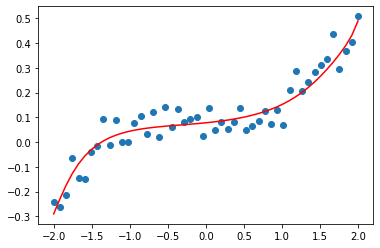

In [ ]:
#TYPE YOUR ANSWER HERE
lbda=0.1

def L(X,y,w):
  #TYPE YOUR ANSWER HERE
  
  return 1/len(y)*(1/2*L2Norm(X@w-y)**2)+(lbda/2)*(L2Norm(w)**2)

def grad_L(X,y,w):
  reg_term = lbda*w 
  reg_term[-1] = 0
  return 1/len(y)*(X.T@(X@w-y))+ reg_term
best_w  = run_optimizer(L, grad_L, X_train, y)
plot_func_curve(best_w, X_train, y)


Changing the value of $\lambda$ and include all the plots you have. You should experiment with either a smaller value or an extremely large value of $\lambda$. 

---
*   What will happen if you set the value of $\lambda$ too small or too large?
*   Report the most reasonable value of $\lambda$ that you found. For that lambda, which components in the best weight are close to zero? 



         Current function value: 0.008387
         Iterations: 6
         Function evaluations: 65
         Gradient evaluations: 54
[ 0.02040615  0.00471532  0.03087831  0.00384504  0.02874097  0.00522604
  0.02357238  0.0004662   0.01345586  0.0022991   0.00883033 -0.0018434
  0.00570391 -0.001747    0.00458589 -0.0028465  -0.00042968 -0.0015879
 -0.00403493 -0.00121927  0.09774092]
Optimization terminated successfully.
         Current function value: 0.527752
         Iterations: 7
         Function evaluations: 15
         Gradient evaluations: 15
[1.31439784e-03 1.13339454e-04 1.42831203e-03 7.40273052e-05
 1.37486029e-03 4.78267060e-05 1.29967001e-03 3.35502021e-05
 1.22851914e-03 2.67546317e-05 1.16606253e-03 2.42753735e-05
 1.11219192e-03 2.42214506e-05 1.06575501e-03 2.55039438e-05
 1.02551622e-03 2.74959164e-05 9.90406107e-04 2.98278905e-05
 1.01545410e-01]


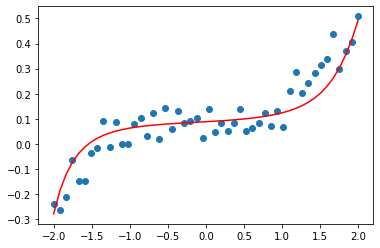

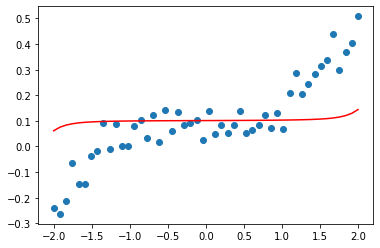

In [ ]:
#TYPE YOUR ANSWER HERE
#lbda = 1
lbda = 1
best_w  = run_optimizer(L, grad_L, X_train, y)
plot_func_curve(best_w, X_train, y)
print (best_w)
#lbda = 100
lbda = 100
best_w  = run_optimizer(L, grad_L, X_train, y)
plot_func_curve(best_w, X_train, y)
print (best_w)



* If **lbda is too large**:
The lost function accounts for all training samples and overfit if testing samples are presented. 

* If **lbda is too small**:
The lost function is too simple and won't be able to be ultilise in linear regression. The function is not complex enough to represent incoming data.